In [1]:
# Author: Romain Tavenard
# License: BSD 3 clause

import copy
import pandas as pd
import tsam.timeseriesaggregation as tsam
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance



seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])[:,:,0]  # Keep only 50 time series
sz = X_train.shape[1]

print(X_train.shape)
print(X_train)
# Euclidean k-means
ks = KShape(n_clusters=3, verbose=True, random_state=seed, n_init=10)
y_pred = ks.fit_predict(X_train)
print(ks.cluster_centers_)



(50, 275)
[[ 0.70284807  0.68160945  0.6521659  ...  0.58225877  0.59099466
   0.59973054]
 [ 0.78424784  0.73068026  0.70852991 ...  0.70239874  0.72068204
   0.78639174]
 [-1.45424119 -1.48088961 -1.49992419 ...  0.73367413  0.6711305
   0.7094401 ]
 ...
 [ 0.75458352  0.79173109  0.79053892 ...  0.7518786   0.68509712
   0.74485583]
 [-1.38201243 -1.36888856 -1.38842409 ...  0.74874298  0.82802719
   0.83448894]
 [ 0.66455793  0.59849792  0.59482124 ...  0.60106258  0.60987859
   0.56296336]]
Init 1
Resumed because of empty cluster
Init 1
Resumed because of empty cluster
Init 1
0.009 --> 0.006 --> 0.005 --> 0.004 --> 0.004 --> 0.004 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.003 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 0.002 --> 
Init 2
Resumed because of empty cluster
Init 2
Resumed because of empty cluster
Init 2
Resumed because of empty cluster
Init 2
0.00

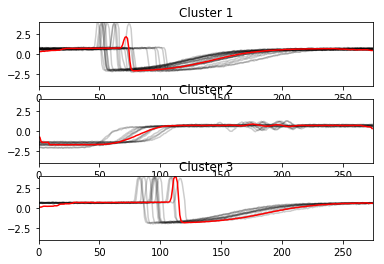

In [2]:
plt.figure()
for yi in range(3):
    plt.subplot(3, 1, 1 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.title("Cluster %d" % (yi + 1))

In [3]:
raw_complete = pd.read_csv('testdata.csv', index_col = 0)
raw=raw_complete.loc[:,'Wind'].to_frame().iloc[:365*24,:]
stacked, timeindex = tsam.unstackToPeriods(copy.deepcopy(raw), 24)
print(stacked.values)

[[ 7.1  8.6  9.7 ...  3.   4.   5. ]
 [ 5.   5.   4.  ...  4.   6.   3. ]
 [ 3.   4.   5.  ...  3.   2.   4. ]
 ...
 [ 6.6  7.7  8.2 ... 10.   9.8  9.9]
 [11.5  9.   8.  ...  5.   5.6  5.2]
 [ 5.8  4.9  6.4 ...  3.4  4.1  5.3]]


In [4]:
mean_t = numpy.mean(stacked, axis=1).values
std_t = numpy.std(stacked, axis=1).values
std_t[std_t == 0.] = 1.
print(mean_t)
print(std_t)

[7.23333333 4.625      4.04166667 7.41666667 7.66666667 5.
 4.         2.         2.66666667 4.04166667 4.70833333 4.79166667
 5.66666667 4.91666667 4.16666667 4.04166667 3.04166667 3.91666667
 1.58333333 1.66666667 4.25       4.45833333 5.54166667 5.
 4.58333333 4.575      2.4625     4.29166667 8.08333333 5.75
 5.91666667 4.54166667 4.20833333 3.91666667 4.33333333 2.9125
 2.43333333 3.29166667 1.58333333 1.45833333 4.66666667 2.91666667
 6.5        4.95833333 4.125      3.54166667 2.25       0.94166667
 3.5375     6.66666667 4.08333333 3.625      5.70833333 2.5
 2.625      4.5        2.29166667 1.13333333 3.48333333 6.825
 5.42083333 6.7375     4.54166667 3.79583333 3.92083333 4.8
 4.64166667 3.35416667 2.275      5.61666667 1.7        1.98333333
 4.1875     4.72083333 3.35833333 2.73333333 2.53333333 3.225
 3.27916667 2.09166667 2.15416667 4.3375     4.02083333 2.76666667
 4.67083333 3.02916667 3.0625     3.27083333 2.85833333 1.6375
 1.5625     1.72083333 3.11666667 3.87083333 4.77

In [5]:
ks_try = KShape(n_clusters=8, verbose=True, random_state=seed, n_init=100)
y_pred_try = ks_try.fit_predict(stacked.values)

Init 1
0.580 --> 0.569 --> 0.567 --> 0.566 --> 0.565 --> 0.566 --> 
Init 2
0.578 --> 0.567 --> 0.566 --> 0.567 --> 
Init 3
0.578 --> 0.568 --> 0.566 --> 0.567 --> 
Init 4
0.586 --> 0.575 --> 0.571 --> 0.570 --> 0.569 --> 0.569 --> 
Init 5
0.587 --> 0.574 --> 0.569 --> 0.567 --> 0.567 --> 0.566 --> 0.568 --> 
Init 6
0.589 --> 0.577 --> 0.571 --> 0.570 --> 0.572 --> 
Init 7
0.585 --> 0.571 --> 0.566 --> 0.565 --> 0.567 --> 
Init 8
0.586 --> 0.575 --> 0.572 --> 0.572 --> 
Init 9
0.598 --> 0.580 --> 0.573 --> 0.568 --> 0.565 --> 0.566 --> 
Init 10
0.594 --> 0.586 --> 0.581 --> 0.571 --> 0.567 --> 0.566 --> 0.566 --> 0.568 --> 
Init 11
0.582 --> 0.569 --> 0.566 --> 0.566 --> 
Init 12
0.583 --> 0.573 --> 0.568 --> 0.566 --> 0.566 --> 0.568 --> 
Init 13
0.586 --> 0.572 --> 0.567 --> 0.565 --> 0.564 --> 0.564 --> 0.564 --> 
Init 14
0.584 --> 0.572 --> 0.568 --> 0.568 --> 0.567 --> 0.568 --> 
Init 15
0.585 --> 0.573 --> 0.570 --> 0.569 --> 0.565 --> 0.564 --> 0.563 --> 0.563 --> 
Init 16
0.581 

In [6]:
# print(y_pred_try.tolist())
# print(mean_t.tolist())
mu_list=[]
std_list=[]
for tpnum in range(8):
    mu_list_TP=[i for ind, i in enumerate(mean_t.tolist()) if y_pred_try.tolist()[ind]==tpnum]
    std_list_TP=[i for ind, i in enumerate(std_t.tolist()) if y_pred_try.tolist()[ind]==tpnum]
    mu_list.append(sum(mu_list_TP)/len(mu_list_TP))
    std_list.append((sum([i**2 for i in std_list_TP])/len(std_list_TP))**0.5)
#     print(mu_list_TP)
#     print(std_list_TP)
#     print("")
# print("")
print(mu_list)
print(std_list)
mean_t_mean=numpy.asarray(mu_list)
std_t_std=numpy.asarray(std_list)
print(mean_t)
print(mean_t_mean)

[3.1039351851851853, 2.856976744186046, 2.892592592592592, 3.243627450980392, 2.757837301587302, 3.293789308176101, 2.9054012345679006, 3.2289548022598864]
[0.8705214974192974, 1.2208139864064813, 1.219400151055863, 1.1973219253936356, 0.9295707445804726, 1.3269803690692559, 1.144823348369168, 1.1866260784653953]
[7.23333333 4.625      4.04166667 7.41666667 7.66666667 5.
 4.         2.         2.66666667 4.04166667 4.70833333 4.79166667
 5.66666667 4.91666667 4.16666667 4.04166667 3.04166667 3.91666667
 1.58333333 1.66666667 4.25       4.45833333 5.54166667 5.
 4.58333333 4.575      2.4625     4.29166667 8.08333333 5.75
 5.91666667 4.54166667 4.20833333 3.91666667 4.33333333 2.9125
 2.43333333 3.29166667 1.58333333 1.45833333 4.66666667 2.91666667
 6.5        4.95833333 4.125      3.54166667 2.25       0.94166667
 3.5375     6.66666667 4.08333333 3.625      5.70833333 2.5
 2.625      4.5        2.29166667 1.13333333 3.48333333 6.825
 5.42083333 6.7375     4.54166667 3.79583333 3.920833

In [7]:
print(ks_try.cluster_centers_[:,:,0])
cluster_centers_rescaled_m=numpy.transpose(numpy.multiply(numpy.transpose(ks_try.cluster_centers_[:,:,0]),std_t_std))
# cluster_centers_rescaled_m=numpy.multiply(std_t,ks_try.cluster_centers_[:,:,0])
print(cluster_centers_rescaled_m)
cluster_centers_rescaled=numpy.transpose(numpy.add(numpy.transpose(cluster_centers_rescaled_m),mean_t_mean))
print(cluster_centers_rescaled)
# cluster_centers_rescaled=ks_try.cluster_centers_[:,:,0]

[[ 0.05324481 -0.37362761 -0.75208673  0.4604529   0.84440771  3.16497843
   1.99013389 -0.59785272 -1.14985559 -1.29397274 -1.44896287 -1.07617945
  -0.61396436 -0.69609205 -0.04123906  0.46745603  0.42032555  0.43590984
   0.30933398  0.23347376  0.18491695 -0.34039556 -0.01077813 -0.16962697]
 [-0.7260035  -0.96843821 -0.79550391 -1.1488244  -0.95405142 -0.63662959
  -0.36428087  0.66543142  1.22607991  1.97533929  1.79168279  1.00271762
   1.06837797  0.65263909  1.1729021   0.81315655  0.53539922 -0.88482017
  -1.08624444 -1.24773419 -1.10106261 -0.60169357 -0.26552558 -0.12291348]
 [-0.65304964 -1.13930253 -0.97714288 -0.81327303  0.01544299  0.04713299
   0.49123648  0.64710677  0.72052785  1.39647632  1.56902563  1.64359005
   1.94959253  1.53818113  0.21388543 -0.57890606 -0.96773486 -1.16655313
  -1.12431913 -1.007404   -0.94543624 -0.54260424 -0.18812691 -0.12834553]
 [ 2.13944969  2.20463027  2.01435579  1.37178612  0.87860247  0.40153495
  -0.18156271 -0.45716898 -0.379314

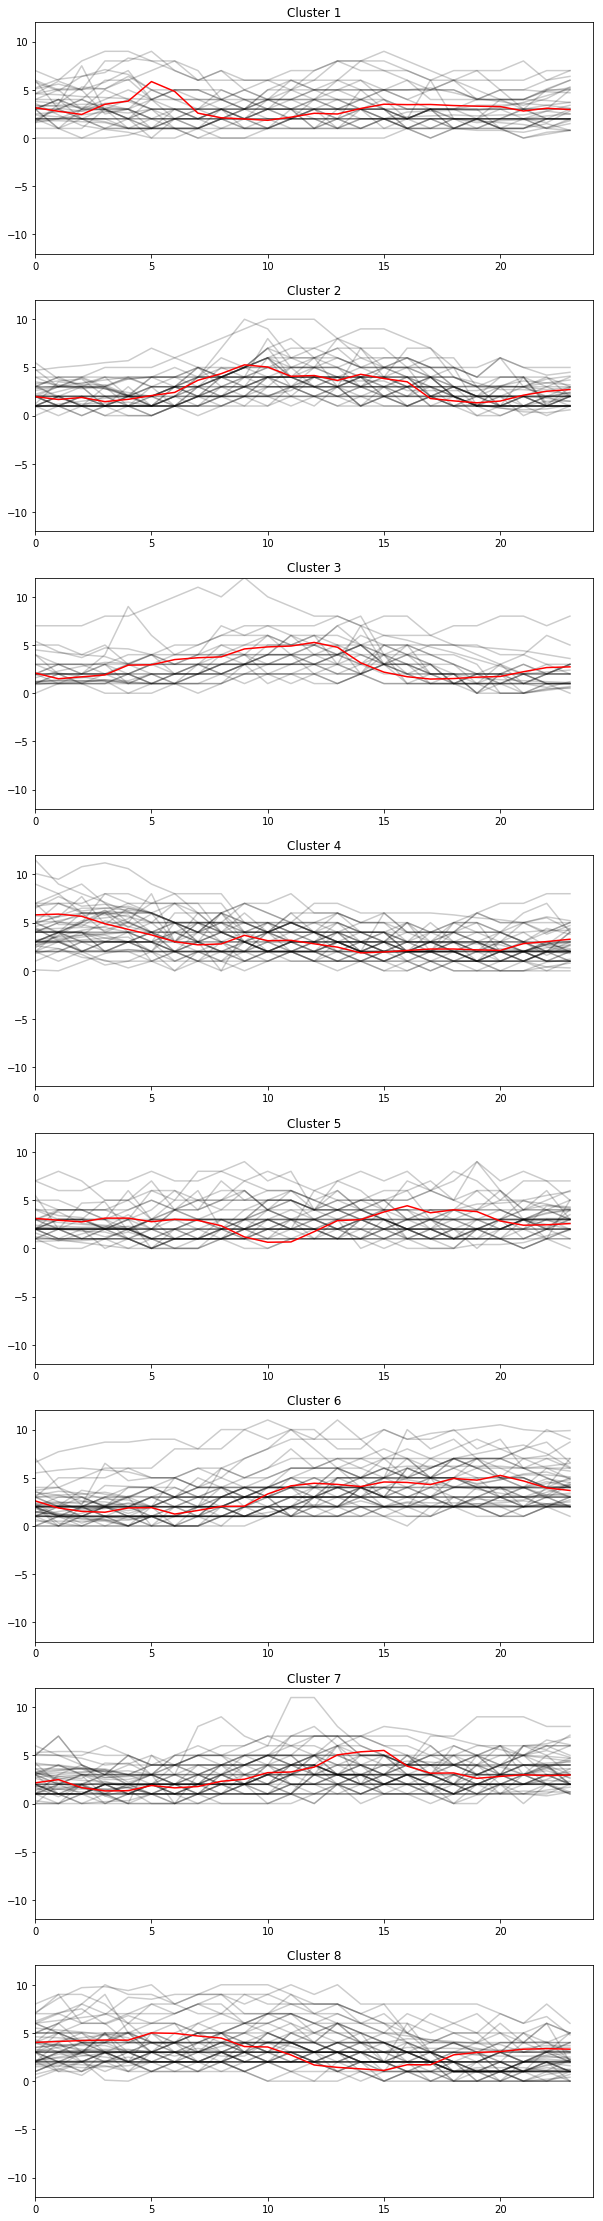

In [8]:
plt.figure(figsize=(10,40))
for yi in range(8):
    plt.subplot(8, 1, 1 + yi)
    for xx in stacked.values[y_pred_try == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(cluster_centers_rescaled[yi].ravel(), "r-")
    plt.xlim(0, 24)
    plt.ylim(-12, 12)
    plt.title("Cluster %d" % (yi + 1))